# Importing Libraries

In [15]:
# Preprocessing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

# To remove outliers
from scipy.stats import zscore

#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

# Warning
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing Scrapped Dataset:

In [16]:
#Reading csv file 
df = pd.read_csv("flipkrt1_reviews.csv")
df

,Unnamed: 0,Review_Title,Reiew_Text,Ratings
0,0,Perfect product!,Beautiful laptop with affordable price at flip...,5
1,1,Classy product,Absolutely Satisfied by the product . Speciall...,5
2,2,Fabulous!,Amazing laptop.\ncreater laptop.\nMid range ga...,5
3,3,Classy product,Laptop is all good. I got it for 72990. If you...,5
4,4,Awesome,"Good for office work, productivity works and c...",5
...,...,...,...,...
20746,20746,Nice product,Product is good for the price but have mainly ...,4
20747,20747,Terrific,"Awesome, purchased it and did not regret a bit",5
20748,20748,Perfect product!,Display quality is very good budget gaming mon...,5
20749,20749,Terrific,"Awesome, purchased it and did not regret a bit",5


This dataset contains 20751 rows and 4 columns.
The column conatins following informations.

Review_Title : Title of the Review.
    
Review_Text : Text Content of the Review.
    
Ratings : Ratings out of 5 stars.

# Exploratory Data Analysis [EDA]:

Since Unnamed: 0 is the index column of csv file so let's drop that column as it will not help us in our predictions.

In [17]:
# Dropping unnecessary column
df.drop(columns = 'Unnamed: 0',inplace = True)
df.drop(columns = 'Review_Title',inplace = True)

In [18]:
# Checking the shape of the dataset
print("So after dropping index column there are {} Rows and {} Columns in the dataset".format(df.shape[0], df.shape[1]))

So after dropping index column there are 20751 Rows and 2 Columns in the dataset


In [26]:
df.head(5)

,Reiew_Text,Ratings
0,Beautiful laptop with affordable price at flip...,5
1,Absolutely Satisfied by the product . Speciall...,5
2,Amazing laptop.\ncreater laptop.\nMid range ga...,5
3,Laptop is all good. I got it for 72990. If you...,5
4,"Good for office work, productivity works and c...",5


In [19]:
# Checking the column names in the dataset
print("Columns present in the dataset are:\n",df.columns)

Columns present in the dataset are:
 Index(['Reiew_Text', 'Ratings'], dtype='object')


In [20]:
# Let's check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20751 entries, 0 to 20750
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Reiew_Text  20751 non-null  object
 1   Ratings     20751 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 324.4+ KB


It is observed that the information we can say that there are no null values present in the dataset and all the columns are of object data type which means all the entries are string entries.

In [21]:
# Checking for null values
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Reiew_Text    0
Ratings       0
dtype: int64


There is no null values present in dataset.

In [23]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5    13010
4     3874
1     2117
3     1264
2      486
Name: Ratings, dtype: int64

Since the highes count in Ratings column is for 5 followed by 5.0 out of 5 stars.

# Let's have a look into target column:

In [27]:
# Checking the unique value count of target column
df['Ratings'].unique()

array([5, 4, 2, 1, 3], dtype=int64)

<AxesSubplot:xlabel='Ratings', ylabel='count'>

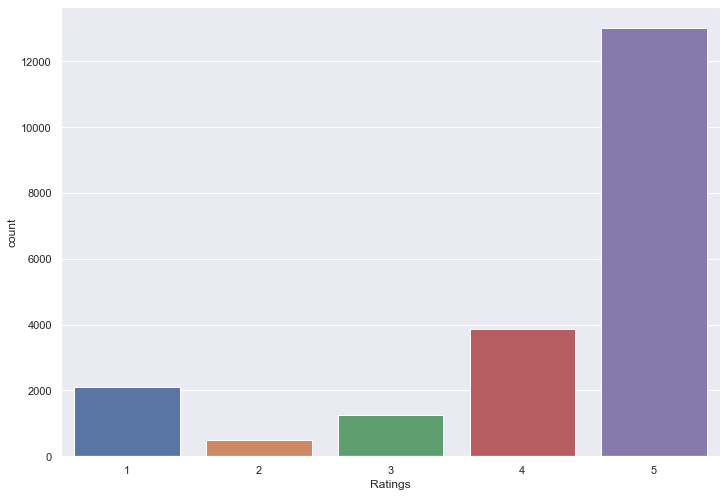

In [28]:
sns.countplot(data=df,x='Ratings')

Here we can see that most of the users has rated the products as highest 5 star & minimum 1 star.We can see that our target variable is imabalanced hence we need to balance it with the help of SMOTE technique.

In [29]:
df["review_length"]=df["Reiew_Text"].str.len()

<AxesSubplot:xlabel='review_length', ylabel='Ratings'>

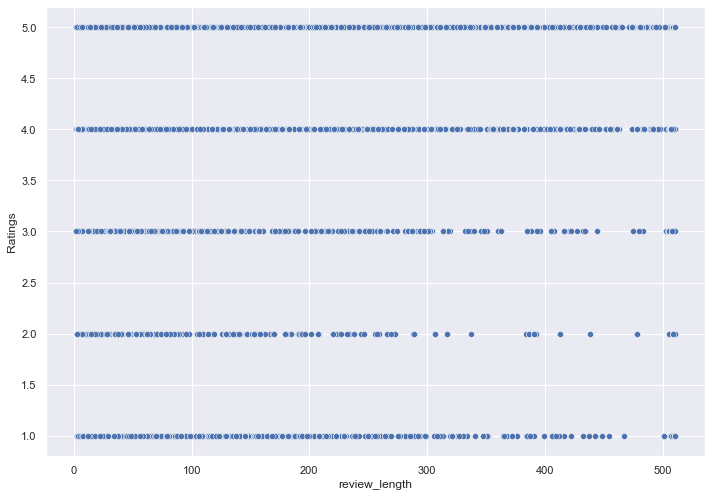

In [30]:
sns.scatterplot(data=df,x="review_length",y="Ratings")

In [32]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [34]:
#converting reviews to lowercase
df['Cleaned_review']=df['Reiew_Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df

,Reiew_Text,Ratings,review_length,Cleaned_review
0,Beautiful laptop with affordable price at flip...,5,487,beautiful laptop with affordable price at flip...
1,Absolutely Satisfied by the product . Speciall...,5,510,absolutely satisfied by the product . speciall...
2,Amazing laptop.\ncreater laptop.\nMid range ga...,5,509,amazing laptop. creater laptop. mid range gami...
3,Laptop is all good. I got it for 72990. If you...,5,508,laptop is all good. i got it for 72990. if you...
4,"Good for office work, productivity works and c...",5,509,"good for office work, productivity works and c..."
...,...,...,...,...
20746,Product is good for the price but have mainly ...,4,280,product is good for the price but have mainly ...
20747,"Awesome, purchased it and did not regret a bit",5,46,"awesome, purchased it and did not regret a bit"
20748,Display quality is very good budget gaming mon...,5,51,display quality is very good budget gaming mon...
20749,"Awesome, purchased it and did not regret a bit",5,46,"awesome, purchased it and did not regret a bit"


In [37]:
# remove punctuation from cleaned review column
df['Cleaned_review'] = df['Cleaned_review'].str.replace('[^\w\s]','')
df.head()

,Reiew_Text,Ratings,review_length,Cleaned_review
0,Beautiful laptop with affordable price at flip...,5,487,beautiful laptop with affordable price at flip...
1,Absolutely Satisfied by the product . Speciall...,5,510,absolutely satisfied by the product specially...
2,Amazing laptop.\ncreater laptop.\nMid range ga...,5,509,amazing laptop creater laptop mid range gaming...
3,Laptop is all good. I got it for 72990. If you...,5,508,laptop is all good i got it for 72990 if youre...
4,"Good for office work, productivity works and c...",5,509,good for office work productivity works and ca...


In [39]:
# remove digits from cleaned review column
df['Cleaned_review'] = df['Cleaned_review'].str.replace('\d+','')
df.head()

,Reiew_Text,Ratings,review_length,Cleaned_review
0,Beautiful laptop with affordable price at flip...,5,487,beautiful laptop with affordable price at flip...
1,Absolutely Satisfied by the product . Speciall...,5,510,absolutely satisfied by the product specially...
2,Amazing laptop.\ncreater laptop.\nMid range ga...,5,509,amazing laptop creater laptop mid range gaming...
3,Laptop is all good. I got it for 72990. If you...,5,508,laptop is all good i got it for if youre gett...
4,"Good for office work, productivity works and c...",5,509,good for office work productivity works and ca...


In [40]:
#nltk.download('wordnet')

In [41]:
df['Cleaned_review']=[lemmatizer.lemmatize(x) for x in df['Cleaned_review']]
df.head()

,Reiew_Text,Ratings,review_length,Cleaned_review
0,Beautiful laptop with affordable price at flip...,5,487,beautiful laptop with affordable price at flip...
1,Absolutely Satisfied by the product . Speciall...,5,510,absolutely satisfied by the product specially...
2,Amazing laptop.\ncreater laptop.\nMid range ga...,5,509,amazing laptop creater laptop mid range gaming...
3,Laptop is all good. I got it for 72990. If you...,5,508,laptop is all good i got it for if youre gett...
4,"Good for office work, productivity works and c...",5,509,good for office work productivity works and ca...


In [42]:
df["Cleaned_review_length"]=df["Cleaned_review"].str.len()
df.head()

,Reiew_Text,Ratings,review_length,Cleaned_review,Cleaned_review_length
0,Beautiful laptop with affordable price at flip...,5,487,beautiful laptop with affordable price at flip...,467
1,Absolutely Satisfied by the product . Speciall...,5,510,absolutely satisfied by the product specially...,458
2,Amazing laptop.\ncreater laptop.\nMid range ga...,5,509,amazing laptop creater laptop mid range gaming...,442
3,Laptop is all good. I got it for 72990. If you...,5,508,laptop is all good i got it for if youre gett...,469
4,"Good for office work, productivity works and c...",5,509,good for office work productivity works and ca...,482


In [43]:
t_vec=TfidfVectorizer()
feature=t_vec.fit_transform(df['Cleaned_review'])

x=feature
y=df['Ratings']

In [44]:
x.shape

(20751, 7914)

In [45]:
x_smote,y_smote=smote.fit_resample(x,y)
print(x.shape)
print(y.shape)
print(x_smote.shape)
print(y_smote.shape)

(20751, 7914)
(20751,)
(65050, 7914)
(65050,)


In [46]:
y_smote.value_counts()

1    13010
2    13010
3    13010
4    13010
5    13010
Name: Ratings, dtype: int64

In [50]:
x=x_smote.toarray()

In [51]:
# split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y_smote,test_size=0.10,random_state=42)

In [52]:
# our problem is classification type of problem.
# import useful libraries for machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model = [LogisticRegression(),DecisionTreeClassifier(),MultinomialNB()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Accuracy of training model is:",train)
    print("Accuracy Score:",accuracy_score(y_test,predm)*100)
    print("Confusion matrix:","\n",confusion_matrix(y_test,predm))
    print("Classification report:","\n",classification_report(y_test,predm))
    print("************************************************************")
    print("\n")

Accuracy of LogisticRegression() is:
Accuracy of training model is: 0.8585532496370314
Accuracy Score: 83.90468870099923
Confusion matrix: 
 [[1161   68   22    4   12]
 [  47 1271   11    5   10]
 [  22   31 1109   48   53]
 [   8   10  114  920  258]
 [   9    2  113  200  997]]
Classification report: 
               precision    recall  f1-score   support

           1       0.93      0.92      0.92      1267
           2       0.92      0.95      0.93      1344
           3       0.81      0.88      0.84      1263
           4       0.78      0.70      0.74      1310
           5       0.75      0.75      0.75      1321

    accuracy                           0.84      6505
   macro avg       0.84      0.84      0.84      6505
weighted avg       0.84      0.84      0.84      6505

************************************************************


Accuracy of DecisionTreeClassifier() is:
Accuracy of training model is: 0.9535741737125288
Accuracy Score: 90.80707148347426
Confusion matrix

In [ ]:
# Save best model
import joblib
joblib.dump(rf,"rf_ratingprediction.pkl")